In [0]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [37]:
from google.colab import files
uploaded = files.upload()

Saving six_1.csv to six_1 (4).csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['six_1.csv']),index_col=0)

In [39]:
df.index

Index(['01-Jan-19', '02-Jan-19', '03-Jan-19', '04-Jan-19', '05-Jan-19',
       '06-Jan-19', '07-Jan-19', '08-Jan-19', '09-Jan-19', '10-Jan-19',
       ...
       '21-Jun-19', '22-Jun-19', '23-Jun-19', '24-Jun-19', '25-Jun-19',
       '26-Jun-19', '27-Jun-19', '28-Jun-19', '29-Jun-19', '30-Jun-19'],
      dtype='object', name='Date', length=181)

In [0]:
df.index = pd.to_datetime(df.index)

In [41]:
df.head(215)

,Sales
Date,
2019-01-01,360.20
2019-01-02,0.01
2019-01-03,139.86
2019-01-04,233.08
2019-01-05,144.08
2019-01-06,46.62
2019-01-07,127.13
2019-01-08,0.01
2019-01-09,0.02


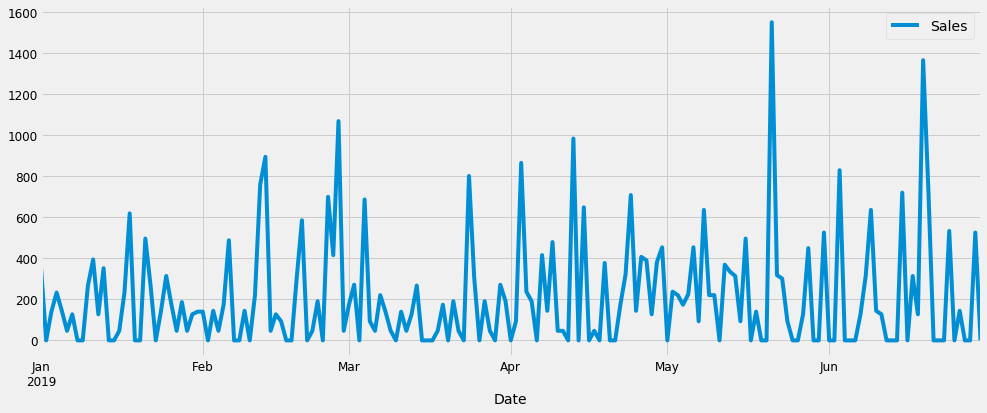

In [42]:
df.plot(figsize=(15, 6))
plt.show()

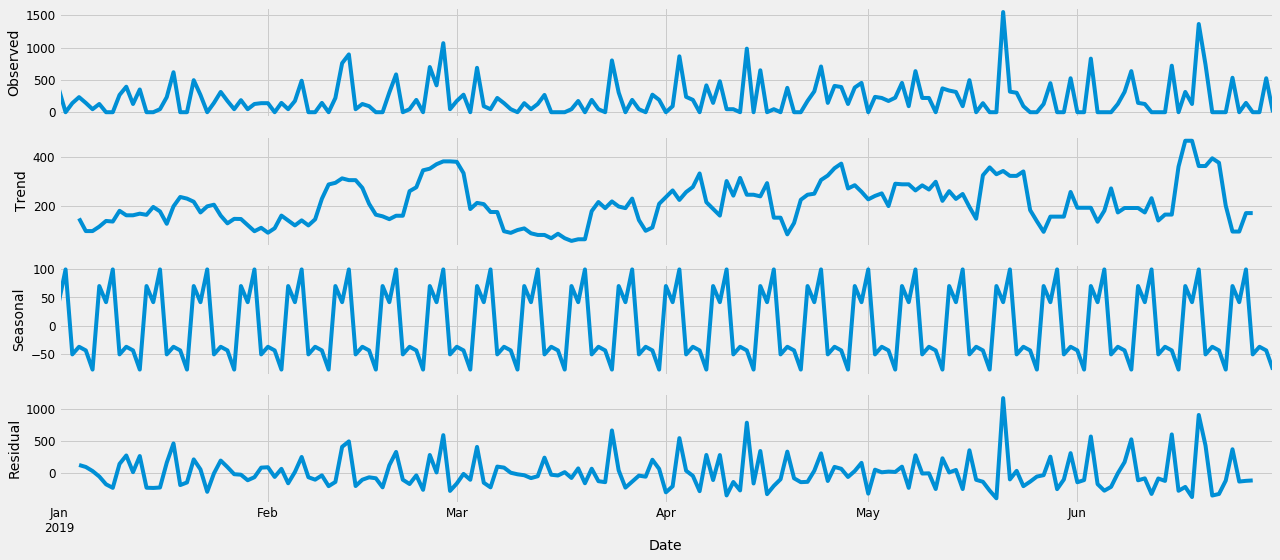

In [43]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

In [44]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 1) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 1)
SARIMAX: (0, 0, 1) x (0, 1, 0, 1)
SARIMAX: (0, 1, 0) x (0, 1, 1, 1)
SARIMAX: (0, 1, 0) x (1, 0, 0, 1)


In [45]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
seasonal_order=param_seasonal,
enforce_stationarity=True,
enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}1 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
          continue

ARIMA(0, 0, 0)x(0, 0, 0, 1)1 - AIC:2626.3057435232226
ARIMA(0, 0, 0)x(0, 0, 1, 1)1 - AIC:2611.079246476914
ARIMA(0, 0, 0)x(0, 1, 0, 1)1 - AIC:2654.775524008064
ARIMA(0, 0, 0)x(0, 1, 1, 1)1 - AIC:2533.257357454975
ARIMA(0, 0, 0)x(1, 0, 0, 1)1 - AIC:2602.3050981040615
ARIMA(0, 0, 0)x(1, 0, 1, 1)1 - AIC:2548.9383082969543
ARIMA(0, 0, 0)x(1, 1, 0, 1)1 - AIC:2608.9338582759974
ARIMA(0, 0, 0)x(1, 1, 1, 1)1 - AIC:2535.184167480327
ARIMA(0, 0, 1)x(0, 0, 0, 1)1 - AIC:2611.079246476914
ARIMA(0, 0, 1)x(0, 0, 1, 1)1 - AIC:2611.4724342768714
ARIMA(0, 0, 1)x(0, 1, 0, 1)1 - AIC:2533.257357454975
ARIMA(0, 0, 1)x(0, 1, 1, 1)1 - AIC:2569.9613566286325
ARIMA(0, 0, 1)x(1, 0, 0, 1)1 - AIC:2548.938405607133
ARIMA(0, 0, 1)x(1, 0, 1, 1)1 - AIC:2550.869670423893
ARIMA(0, 0, 1)x(1, 1, 0, 1)1 - AIC:2535.1841675741844
ARIMA(0, 0, 1)x(1, 1, 1, 1)1 - AIC:2535.4191507791456
ARIMA(0, 1, 0)x(0, 0, 0, 1)1 - AIC:2654.775524008064
ARIMA(0, 1, 0)x(0, 0, 1, 1)1 - AIC:2533.257357454975
ARIMA(0, 1, 0)x(0, 1, 0, 1)1 - AIC:283

In [47]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(0, 0, 0),
                                seasonal_order=(1, 1, 1, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False,
                               trend='ct')
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.5760      1.915      0.823      0.411      -2.178       5.330
drift         -0.0102      0.017     -0.588      0.557      -0.044       0.024
ar.S.L1       -0.0164      0.081     -0.203      0.839      -0.175       0.142
ma.S.L1       -0.9912      0.083    -11.939      0.000      -1.154      -0.828
sigma2      7.527e+04   8469.174      8.888      0.000    5.87e+04    9.19e+04


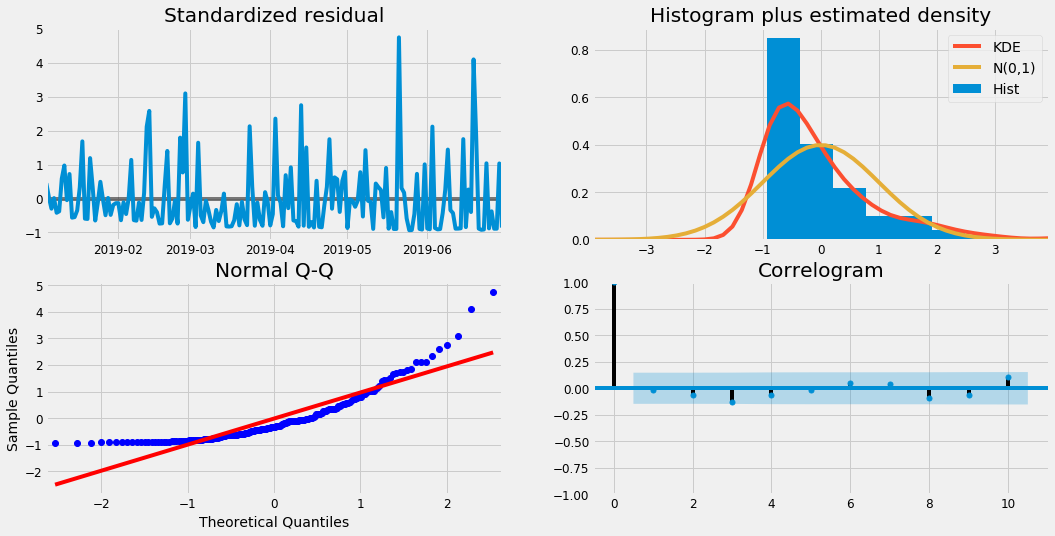

In [48]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

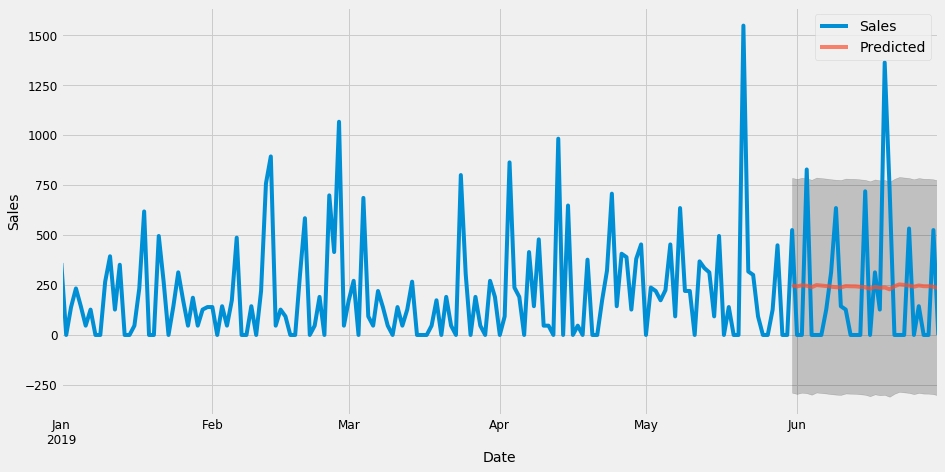

In [49]:
pred = results.get_prediction(start=pd.to_datetime('2019-05-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = df['2019-01-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

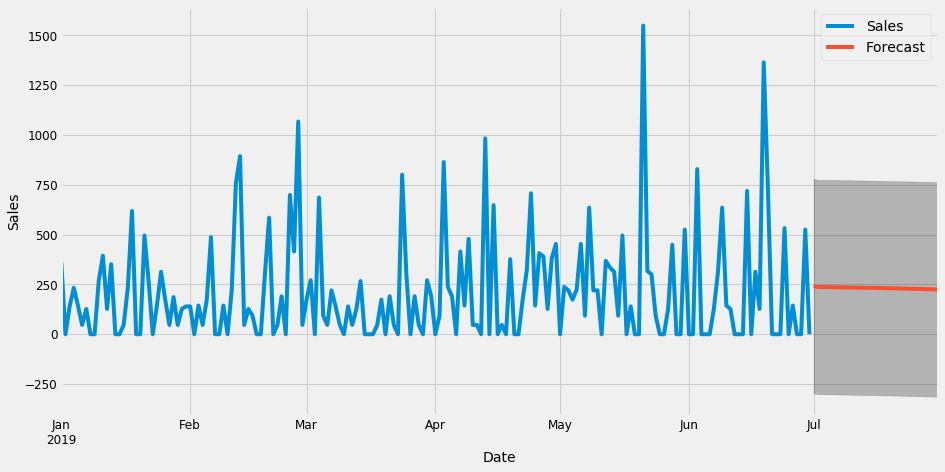

In [50]:
pred_uc = results.get_forecast(steps=31)
pred_ci = pred_uc.conf_int()
ax = df.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [51]:
x=list(pred.predicted_mean)
print(x)

[248.66823646750046, 242.90092124823758, 249.07314411729897, 246.5724155219335, 238.85907259823284, 250.0290976734957, 247.50586442881794, 245.00333216452916, 241.7066860686607, 239.31895954372544, 237.91994774629052, 244.97212683284442, 244.0048184580107, 243.58933660993478, 241.09031957723022, 238.61037987638824, 231.42198477348774, 240.81104741859392, 236.24500932927333, 238.08329758044653, 228.6227103793169, 243.67356482599718, 253.19035177251442, 250.545787079573, 247.92070167199918, 241.729566091096, 247.90854799493667, 244.31652544997405, 244.08585946789273, 241.49091245736327, 235.34072054104092]


In [58]:
y=list(df['2019-05-30':].Sales)
print(y)

[0.01, 525.43, 0.01, 0.01, 828.86, 0.01, 0.01, 0.01, 127.13, 313.57, 635.62, 144.08, 127.13, 0.01, 0.01, 0.01, 719.52, 0.01, 313.57, 127.13, 1364.42, 736.45, 0.01, 0.01, 0.01, 533.07, 0.01, 144.08, 0.01, 0.01, 525.43, 0.01]


In [53]:
p=list(pred_uc.predicted_mean)
print(p)
print(sum(p))

[241.42244884677746, 237.18403035401772, 236.95918815662037, 236.6583828657545, 236.34860172305255, 236.02874746789055, 235.69883807355487, 235.3588732456405, 235.0088529889698, 234.64877730346385, 234.2786461891239, 233.8984596459499, 233.5082176739419, 233.10792027309992, 232.6975674434239, 232.27715918491387, 231.84669549756984, 231.4061763813918, 230.9556018363797, 230.49497186253362, 230.02428645985353, 229.54354562833942, 229.05274936799128, 228.55189767880913, 228.04099056079298, 227.5200280139428, 226.9890100382586, 226.44793663374043, 225.89680780038822, 225.335623538202, 224.76438384718173]
7191.955416581569


In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [55]:
mse = mean_squared_error(y, x)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 336.675161


In [57]:
print("Actual Sales (Jun):",sum(y))
print("Predicted Sales (Jun):",sum(x))
print("Forecasted Sales (Jul):",sum(p))

Actual Sales (Jun): 7165.650000000002
Predicted Sales (Jun): 7525.211245766638
Forecasted Sales (Jul): 7191.955416581569


In [0]:
import statistics 

sample = y
print("Standard Deviation is % s "% (statistics.stdev(sample))) 

Standard Deviation is 371.5507664454974 
